## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN'], axis=1, inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


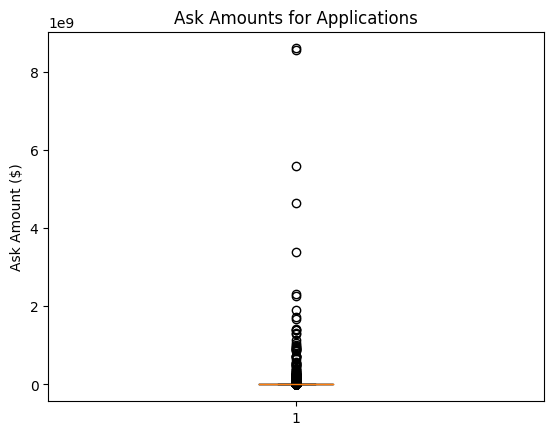

In [3]:
# Example outlier plot of reaction times
ask_amounts = application_df['ASK_AMT'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts for Applications')
ax1.set_ylabel('Ask Amount ($)')
ax1.boxplot(ask_amounts)
plt.show()

In [4]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [amount for amount in ask_amounts if amount < lower_bound or amount > upper_bound]
print(len(potential_outliers))

8206


In [5]:
application_df = application_df[(application_df['ASK_AMT'] >= lower_bound) & (application_df['ASK_AMT'] <= upper_bound)]


In [6]:
# Determine the number of unique values in each column.
print(application_df.nunique())

NAME                      13250
APPLICATION_TYPE             12
AFFILIATION                   6
CLASSIFICATION               65
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                     656
IS_SUCCESSFUL                 2
dtype: int64


In [7]:
application_df["NAME"].value_counts()

PARENT BOOSTER USA INC                                    1130
TOPS CLUB INC                                              765
UNITED STATES BOWLING CONGRESS INC                         618
WASHINGTON STATE UNIVERSITY                                487
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC            385
                                                          ... 
SOUTHERN ARIZONA LUTHERAN CAMPING ASSOCIATION                1
WIS TEQ NEEMIT                                               1
YOUNG ARTISTS SYMPHONY ORCHESTRA                             1
CATHOLIC CEMETERY AND CHARITABLE IRRV TR                     1
AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LOCAL 2886       1
Name: NAME, Length: 13250, dtype: int64

In [8]:

name_counts = application_df["NAME"].value_counts()
filtered_name_counts = name_counts[name_counts > 100]
filtered_name_counts

PARENT BOOSTER USA INC                                                1130
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     618
WASHINGTON STATE UNIVERSITY                                            487
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        385
PTA TEXAS CONGRESS                                                     329
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               234
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          229
MOMS CLUB                                                              210
AMERICAN ASSOCIATION OF UNIVERSITY WOMEN                               191
FARMERS EDUCATIONAL AND C

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()


T3     20086
T4      1331
T19      999
T5       894
T6       882
T8       669
T7       633
T10      508
T13       54
T9        18
T12       13
T2         6
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Creating a list of application types to replace with 'Other'. Keeping more types this time.
application_types_to_replace = ['T2']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       20086
T4        1331
T19        999
T5         894
T6         882
T8         669
T7         633
T10        508
T13         54
T9          18
T12         13
Other        6
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
filtered_names = name_counts[len(filtered_name_counts):].index
names_to_replace = filtered_names.tolist()

# Replace in dataframe
for cls in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 18826
PARENT BOOSTER USA INC                                                 1130
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      618
WASHINGTON STATE UNIVERSITY                                             487
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         385
PTA TEXAS CONGRESS                                                      329
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                234
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           229
MOMS CLUB                                                               210
AMERICAN ASS

In [12]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
         ...  
C1732        1
C1728        1
C4120        1
C1245        1
C2150        1
Name: CLASSIFICATION, Length: 65, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
counts = application_df["CLASSIFICATION"].value_counts()
filtered_counts = counts[counts > 1]
filtered_counts


C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
C7000      546
C1700      223
C4000      129
C5000      106
C1270       89
C2700       75
C7100       62
C2800       61
C1280       46
C1300       42
C1230       35
C2300       28
C1240       28
C1400       27
C7200       20
C6000       14
C8000       13
C1250       13
C7120       11
C1278       10
C1237        9
C8200        9
C1238        9
C1235        9
C1500        7
C1720        6
C1257        5
C7210        5
C2400        4
C1600        4
C4100        4
C1260        3
C1800        3
C1267        2
C1246        2
C1256        2
C0           2
Name: CLASSIFICATION, dtype: int64

In [14]:
# Choosing a cutoff value and creating a list of classifications to be replaced. Keeping 10 classifications this time.
filtered_classification_names = counts[10:].index
classifications_to_replace = filtered_classification_names.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()


C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
Other      593
C7000      546
C1700      223
C4000      129
C5000      106
C1270       89
Name: CLASSIFICATION, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
columns_to_convert = ["NAME", "APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT"]
application_df_dummies = pd.get_dummies(application_df[columns_to_convert])


# Combine the converted categories df with the original and drop the original categorical columns
application_conv_cat_df = pd.concat([application_df, application_df_dummies], axis=1)
application_conv_cat_df.drop(columns_to_convert, axis=1, inplace=True)
application_conv_cat_df.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,N,5000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,N,5000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,N,6692,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,1,N,5000,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,1,N,5000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# Dropping SPECIAL CONSIDERATIONS and STATUS columns
application_conv_cat_df.drop(["SPECIAL_CONSIDERATIONS", "STATUS"], axis=1, inplace=True)

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_conv_cat_df.IS_SUCCESSFUL.values
X = application_conv_cat_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

dimensions = len(X_train[0])

# First hidden layer
# adding less units this time
nn_model.add(tf.keras.layers.Dense(units=7, activation="relu", input_dim=dimensions))

# Second hidden layer
# adding less units this time
nn_model.add(tf.keras.layers.Dense(units=14, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 539       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 666
Trainable params: 666
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [21]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs= 100)

Epoch 1/100
612/612 [==============================] - 2s 2ms/step - loss: 0.5438 - accuracy: 0.7260
Epoch 2/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7636
Epoch 3/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.7706
Epoch 4/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.7769
Epoch 5/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7785
Epoch 6/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7795
Epoch 7/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.7802
Epoch 8/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.7798
Epoch 9/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7802
Epoch 10/100
612/612 [==============================] - 1s 2ms/step - loss: 0.4568 - accura

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 1s - loss: 0.4650 - accuracy: 0.7777 - 521ms/epoch - 3ms/step
Loss: 0.4650331437587738, Accuracy: 0.7777436971664429


In [23]:
# Export our model to HDF5 file

nn_model.save('AlphabetSoupCharity_Optimization.h5')

In [24]:
from google.colab import files
files.download('AlphabetSoupCharity_Optimization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>